<a href="https://colab.research.google.com/github/G-Shino/colab_tutorial/blob/master/Scikit_learn_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scikit-learn
- 分類／回帰／クラスタリングを行うことができる
- [このサイト](https://techacademy.jp/magazine/17375)に、チートシートなどがある。


## 機械学習のデータセットについて
- 訓練データ(trainning)、検証データ(validation)、テストデータ(test)の3つに分ける
- 50%-25%-25%が典型的らしい...?
- 70% should be train cases, 10% will be test cases and the rest 20% should be validation casesという話もある
- 訓練データを用いて機械学習モデル自体を調整(学習)　勉強
- 検証データを用いて、学習の結果を評価。ハイパーパラメータ(隠れ層の数とか)の調整に用いる　模試　ただこいつが無い場合も結構あるっぽい

- テストデータを使ってモデルの最終的な予測結果を評価(モデルの学習が完了して時点)　本番


# Pythonで始める機械学習
- とりあえず最初はmglearnを使っちゃう
- あとでseabornやnumpyなどに置き換えていく所存

## 必要なモジュール

In [0]:
!pip install mglearn

     |████████████████████████████████| 542kB 9.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from IPython.display import display

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## アイリスのクラス分類

### データを読む

In [0]:
from IPython.display import display
from sklearn.datasets import load_iris
import pandas as pd
iris_dataset = load_iris()
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [0]:
#データの概要
print(iris_dataset["DESCR"][:193])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre


In [0]:
iris_dataset["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
iris_dataset["data"][:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [0]:
iris_dataset["target"][:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
iris_dataset["filename"]

'/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/iris.csv'

In [0]:
#訓練データとテストデータを分ける


### モデルの作成

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset["data"], 
                                                    iris_dataset["target"], 
                                                    random_state=0)

In [0]:
print("X_train shape {}".format(X_train.shape))
print("X_test shape {}".format(X_test.shape))
print("y_train shape {}".format(y_train.shape))
print("y_test shape {}".format(y_test.shape))

X_train shape (112, 4)
X_test shape (38, 4)
y_train shape (112,)
y_test shape (38,)


In [0]:
import pandas as pd
iris_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
display(iris_df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


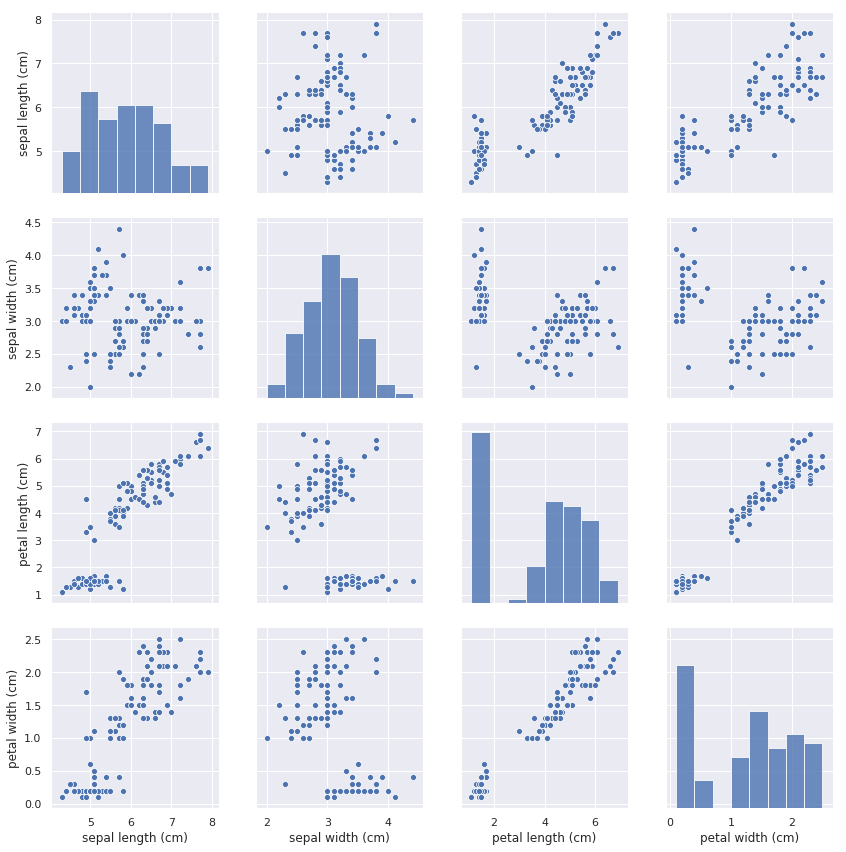

In [0]:
import seaborn as sns

sns.set(style="darkgrid")
gr = sns.pairplot(data=iris_df, 
                  height=3, 
                  diag_kind="hist", kind="scatter", 
                  diag_kws=dict(alpha=0.8, histtype="bar", bins=8))

In [0]:
#k近傍法
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
#モデルの評価 お試し
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new shape {}".format(X_new.shape))

X_new shape (1, 4)


In [0]:
print(iris_dataset.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [0]:
prediction = knn.predict(X_new)
print("Prediction:{}".format(prediction))
print("Prediction target name:{}".format(iris_dataset["target_names"][prediction]))

Prediction:[0]
Prediction target name:['setosa']


In [0]:
#モデルの評価 テストデータによる
y_pred = knn.predict(X_test)
print(f"y_pred shape {y_pred.shape}")

y_pred shape (38,)


In [0]:
#丸括弧はカッコ内の評価値を返す (1 + 3) * 5とか
#タプルはあくまでカンマによって生成されることに注意
bool_array = (y_pred == y_test)

In [0]:
print(bool_array)
print(type(bool_array))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False]
<class 'numpy.ndarray'>


In [0]:
#Trueは1、Falseは0である
np.mean(bool_array)

0.9736842105263158

In [0]:
#直接評価値を出す方法も存在する
knn.score(X_test, y_test)

0.9736842105263158

## クラス分類と回帰
- 回帰分類は出力に何らかの連続性がある e.g.)年収や収穫量など
- クラス分類は連続性がない e.g.)天気や言語など
- 汎化性能、大事。過剰適合(過学習)や適合不足(未学習)に注意
- データセットが大きい方が(データバリエーションが豊富な方が)良い

### 用いるデータセット

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Text(0, 0.5, 'Second feature')

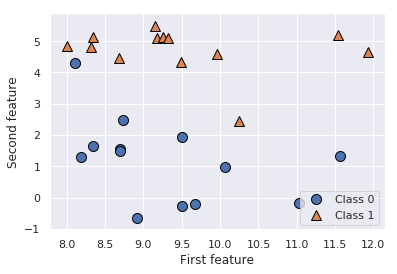

In [79]:
import mglearn
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")

30
26
(26, 2)
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
13
13


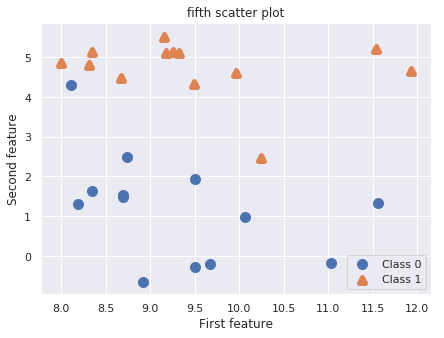

In [80]:
#上記のデータ生成を再現したコード
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt

#要素数30,頂点2つのガウス系の分布。特徴量は2つ
X, y = make_blobs(n_samples=30, centers=2, n_features=2, random_state=4)
#7と27の値を0にしている。謎
y[np.array([7, 27])] = 0
#マスクを作成。30個の要素を26個にしている。0,1,5,26を削除
#これも謎だが、マスクの仕方がわかる。
mask = np.ones(len(X), dtype=np.bool)
mask[np.array([0, 1, 5, 26])] = 0
print(len(X))
X, y = X[mask], y[mask]
print(len(X))
print(X.shape)
print(y)

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1, 1, 1)

x0_class0 = X[:, 0][y == 0]
x1_class0 = X[:, 1][y == 0]
print(len(x_class0))
x0_class1 = X[:, 0][y == 1]
x1_class1 = X[:, 1][y == 1]
print(len(x_class1))

ax.scatter(x0_class0, x1_class0, linewidth=5, marker="o", label="Class 0")
ax.scatter(x0_class1, x1_class1, linewidth=5, marker="^", label="Class 1")

ax.set_title('fifth scatter plot')
ax.set_xlabel('First feature')
ax.set_ylabel('Second feature')
ax.legend(loc='lower right')
fig.show()

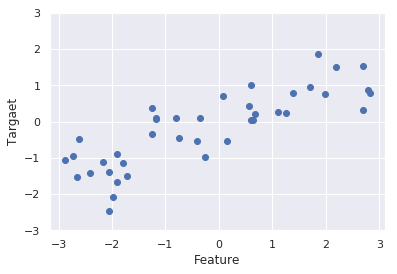

In [83]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, "o")
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Targaet")
plt.show()

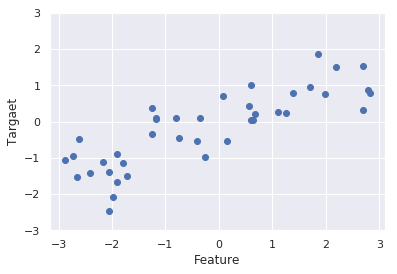

In [85]:
#上の再現
#乱数のシード値を持ったインスタンスを作成
n_samples = 40
rnd = np.random.RandomState(42)
#一様分布で-3から3までの乱数を作成
X = rnd.uniform(-3, 3, size=n_samples)
# sin4x + xのグラフ
y_no_noise = (np.sin(4 * X) + X)
#ノイズを載せる 標準正規分布に従う乱数の作成
noise = rnd.normal(size=len(X))
y = (y_no_noise + noise) / 2

plt.plot(X, y, "o")
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Targaet")
plt.show()

In [87]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [128]:
cancer_df = pd.DataFrame(cancer.data, columns=cancer["feature_names"])
cancer_df["target"] = cancer.target
display(cancer_df.head())

mask = (cancer_df["target"] == 0)
cancer_df.loc[cancer_df["target"] == 0, "target"] = cancer["target_names"][0]
cancer_df.loc[cancer_df["target"] == 1, "target"] = cancer["target_names"][1]
# print(cancer_df["target"])
display(cancer_df.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [126]:
list_target = cancer.target
num_ben = len(list_target[list_target == 0])
num_mal = len(list_target[list_target == 1])
print(f"num_ben:{num_ben}, num_mal:{num_mal}")

num_ben:212, num_mal:357


In [118]:
# -*- coding: utf-8 -*-
import numpy as np

# 配列の宣言
y = np.array([8,9,10,11,15,18,22,21,20,29]) 

# 条件を満たすインデックスを取得
x = np.where((y>=10)&(y<20)) # [2 3 4 5]

# 結果を表示
print(x[0])

[2 3 4 5]


In [123]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [125]:
boston.data.shape

(506, 13)

In [129]:
X, y = mglearn.datasets.load_extended_boston()
print("X shape {}".format(X.shape))

X shape (506, 104)


In [132]:
#上の再現
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
boston = load_boston()
X = boston.data

#MinMaxScalerはデータ(特徴量)が0〜1に入るように調整している
#インスタンスのメソッドを呼び出しているのかな
#fitしてtransformする
#fit パラメータ（平均や標準偏差 etc）計算
#transform パラメータをもとにデータ変換
#fit_transform パラメータ計算とデータ変換をまとめて実行

X = MinMaxScaler().fit_transform(boston.data)
#PolynomialFeatures(degree=2, include_bias=False)
#biasがTrueだと
#2次までの非線形効果を入れる(2次の変数を作るインスタンス).これを特徴量に加える
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
X.shape

(506, 104)